<a href="https://colab.research.google.com/github/dsdayat/Data-manipulation/blob/main/HW_DATA_MANIPULATION_AGUS_NUR_HIDAYAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download this Telco Customer Churn dataset and then answer these questions.



1.   Normalize column TotalCharges
2.   Standardize column TotalCharges
3.   Do log transformation for column TotalCharges
4.   Create 1 new feature based on 1 or more initial features
5.   Encode InternetService column (assume it has hierarchy)
6.   Encode PaymentMethod column (assume it doesn't has hierarchy)
7.   Remove outliers from column TotalCharges (you can choose one method: z-score OR IQR)
8.   Bin column tenure into 3 categories: Low Tenure, Medium Tenure, High Tenure (you can define your own threshold)













In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [399]:
df=pd.read_csv('telco.csv')

In [400]:
dfn=df.copy()

In [401]:
dfn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [403]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [404]:
dfn['TotalCharges']=pd.to_numeric(dfn['TotalCharges'], errors='coerce')

In [405]:
dfn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [406]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [407]:
dfn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [408]:
(11/743)*100

1.4804845222072678

In [409]:
dfn[dfn['TotalCharges'].isna()] #lihat data yang nan, tenurenya 0, bisa di negasi /dihilangkan

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [410]:
dfn=dfn[~dfn['TotalCharges'].isna()]#menegasikan missing value

In [411]:
dfn.info()#cek apa data sudah hilang missing valuenya dan row biang kerok wkwk

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


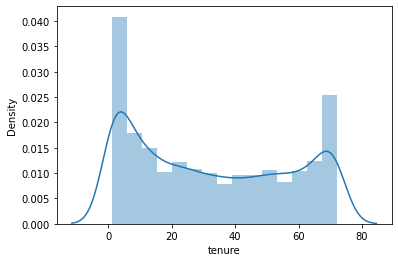

In [412]:
sns.distplot(dfn['tenure'])

In [413]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dfn[['tenure']])
dfn['Normalized_tenure'] = scaler.transform(dfn[['tenure']])

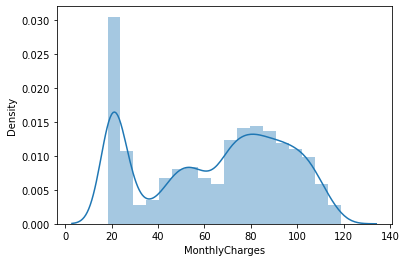

In [414]:
sns.distplot(df['MonthlyCharges'])

In [415]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dfn[['MonthlyCharges']])
dfn['Normalized_MonthlyCharges'] = scaler.transform(dfn[['MonthlyCharges']])


## **1.   Normalize column TotalCharges**

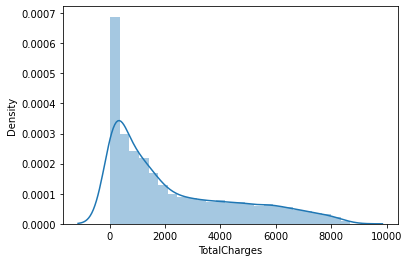

In [416]:
sns.distplot(dfn['TotalCharges'])

In [417]:
dfn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Normalized_tenure,Normalized_MonthlyCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.442560,0.463166
std,0.368844,24.545260,30.085974,2266.771362,0.345708,0.299363
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.112676,0.172512
50%,0.000000,29.000000,70.350000,1397.475000,0.394366,0.518408
75%,0.000000,55.000000,89.862500,3794.737500,0.760563,0.712562
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000


In [418]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dfn[['TotalCharges']])
dfn['Normalized_TotalCharges'] = scaler.transform(dfn[['TotalCharges']])


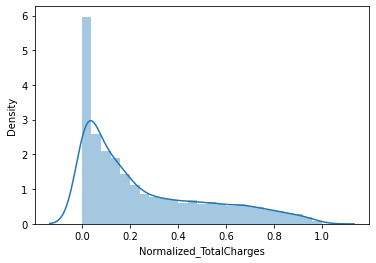

In [419]:
sns.distplot(dfn['Normalized_TotalCharges'])

In [420]:
dfn[['Normalized_TotalCharges','TotalCharges']].describe()

,Normalized_TotalCharges,TotalCharges
count,7032.000000,7032.000000
mean,0.261309,2283.300441
std,0.261571,2266.771362
min,0.000000,18.800000
25%,0.044155,401.450000
50%,0.159090,1397.475000
75%,0.435719,3794.737500
max,1.000000,8684.800000


## **2.   Standardize column TotalCharges**

In [421]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [422]:
scaler.fit(dfn[['TotalCharges']])

StandardScaler()

In [423]:
dfn['Std_TotalCharges'] = scaler.transform(dfn[['TotalCharges']])

In [424]:
dfn[['Std_TotalCharges']].describe()

,Std_TotalCharges
count,7.032000e+03
mean,-1.119064e-16
std,1.000071e+00
min,-9.990692e-01
25%,-8.302488e-01
50%,-3.908151e-01
75%,6.668271e-01
max,2.824261e+00


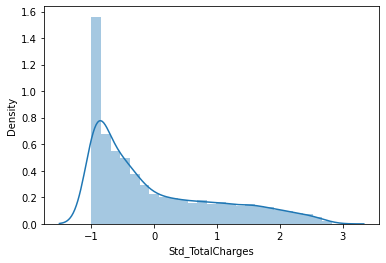

In [425]:
sns.distplot(dfn['Std_TotalCharges'])

## **3.   Do log transformation for column TotalCharges**

In [426]:
import warnings
warnings.filterwarnings('ignore')

In [427]:
dfn['TotalCharges_log'] = np.log(dfn['TotalCharges'] + 1)

In [428]:
dfn.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Normalized_tenure,Normalized_MonthlyCharges,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,0.000000,0.115423,0.001275,-0.994194,3.429137
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,No,0.464789,0.385075,0.215867,-0.173740,7.544597
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0.014085,0.354229,0.010310,-0.959649,4.692723


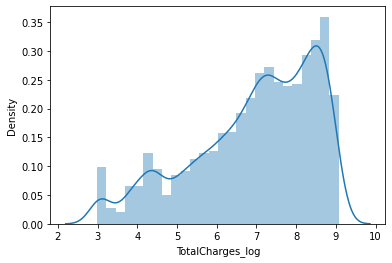

In [429]:
sns.distplot(dfn['TotalCharges_log'])

## **4.   Create 1 new feature based on 1 or more initial features**
new feature yang mau dibuat, fitur cek membership status

In [430]:
dfn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Normalized_tenure,Normalized_MonthlyCharges,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,0.000000,0.115423,0.001275,-0.994194,3.429137
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,No,0.464789,0.385075,0.215867,-0.173740,7.544597
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0.014085,0.354229,0.010310,-0.959649,4.692723
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,0.619718,0.239303,0.210241,-0.195248,7.518471
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,Yes,0.014085,0.521891,0.015330,-0.940457,5.028148
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Electronic check,99.65,820.50,Yes,0.098592,0.809950,0.092511,-0.645369,6.711132
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,Credit card (automatic),89.10,1949.40,No,0.295775,0.704975,0.222779,-0.147313,7.575790
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,Mailed check,29.75,301.90,No,0.126761,0.114428,0.032668,-0.874169,5.713403
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Electronic check,104.80,3046.05,Yes,0.380282,0.861194,0.349325,0.336516,8.021929
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,Bank transfer (automatic),56.15,3487.95,No,0.859155,0.377114,0.400317,0.531476,8.157356


In [431]:
dfn['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [432]:
# Categorize loyalty membership berdasarkan tenure
def ms(x):
    if x == 'Yes':
        return 'Active'
    else:
        return 'Inactive'
    
dfn['membership_status'] = dfn['Churn'].apply(ms)

In [433]:
dfn.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Normalized_tenure,Normalized_MonthlyCharges,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log,membership_status
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Electronic check,29.85,29.85,No,0.000000,0.115423,0.001275,-0.994194,3.429137,Inactive
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Mailed check,56.95,1889.50,No,0.464789,0.385075,0.215867,-0.173740,7.544597,Inactive
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Mailed check,53.85,108.15,Yes,0.014085,0.354229,0.010310,-0.959649,4.692723,Active


## **5.   Encode InternetService column (assume it has hierarchy)**

Fiber Optic ==fast== level 2

DSL == Standar== Level 1

No==Sometimesbeingquietisokkay==Level 0 >.<

In [434]:
dfn['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [435]:
def spl (x):
    if x == 'DSL':
        return int(1)
    elif x == 'Fiber optic':
        return int(2)
    elif x =='No':
        return int(0)
    
dfn['Speed_Level'] = dfn['InternetService'].apply(spl)

In [436]:
dfn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Normalized_tenure,Normalized_MonthlyCharges,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log,membership_status,Speed_Level
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0.000000,0.115423,0.001275,-0.994194,3.429137,Inactive,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,0.464789,0.385075,0.215867,-0.173740,7.544597,Inactive,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,0.014085,0.354229,0.010310,-0.959649,4.692723,Active,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,0.619718,0.239303,0.210241,-0.195248,7.518471,Inactive,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,0.014085,0.521891,0.015330,-0.940457,5.028148,Active,2



## **6.   Encode PaymentMethod column (assume it doesn't has hierarchy)**


In [437]:
dfn['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [438]:
pd.get_dummies(dfn['PaymentMethod'],prefix='PaymentMethod')

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7038,0,0,0,1
7039,0,1,0,0
7040,0,0,1,0
7041,0,0,0,1


In [439]:
dfis=dfn.join(pd.get_dummies(dfn['PaymentMethod'],prefix='PaymentMethod'))
dfis

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Normalized_MonthlyCharges,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log,membership_status,Speed_Level,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0.115423,0.001275,-0.994194,3.429137,Inactive,1,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0.385075,0.215867,-0.173740,7.544597,Inactive,1,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0.354229,0.010310,-0.959649,4.692723,Active,1,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0.239303,0.210241,-0.195248,7.518471,Inactive,1,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0.521891,0.015330,-0.940457,5.028148,Active,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,0.662189,0.227521,-0.129180,7.596643,Inactive,1,0,0,0,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,0.845274,0.847461,2.241056,8.904345,Inactive,2,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,0.112935,0.037809,-0.854514,5.850621,Inactive,1,0,0,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,0.558706,0.033210,-0.872095,5.728800,Active,2,0,0,0,1


## **7.   Remove outliers from column TotalCharges (you can choose one method: z-score OR IQR)**


In [440]:
import seaborn as sns

In [441]:
dfnt= dfn.copy()

In [442]:
dfnt['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

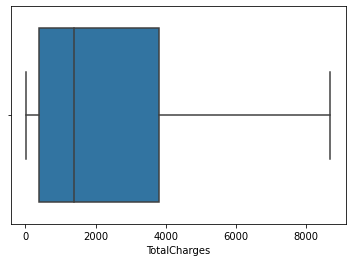

In [443]:
sns.boxplot(x=dfnt['TotalCharges'])
plt.show()

In [444]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]

In [445]:
dfnt['outlier_TC']=check_outlier(data=dfnt,column='TotalCharges')

In [446]:
dfnt[dfnt['outlier_TC']=='outlier']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Normalized_tenure,Normalized_MonthlyCharges,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log,membership_status,Speed_Level,outlier_TC


## **8.   Bin column tenure into 3 categories: Low Tenure, Medium Tenure, High Tenure (you can define your own threshold)**

In [447]:
dfn[['tenure']].describe()

,tenure
count,7032.000000
mean,32.421786
std,24.545260
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [448]:
dfn.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Normalized_tenure,Normalized_MonthlyCharges,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log,membership_status,Speed_Level
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0.000000,0.115423,0.001275,-0.994194,3.429137,Inactive,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,0.464789,0.385075,0.215867,-0.173740,7.544597,Inactive,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,0.014085,0.354229,0.010310,-0.959649,4.692723,Active,1


In [449]:
# Categorize loyalty membership berdasarkan tenure
def lm(x):
    if x <= 9.0:
        return 'Low Tenure'
    elif x > 9.0 and x <= 29.0:
        return 'Medium Tenure'
    elif x > 29.0:
        return 'High Tenure'
    
dfn['loyaltymembership'] = dfn['tenure'].apply(lm)

In [450]:
dfn.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Normalized_tenure,Normalized_MonthlyCharges,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log,membership_status,Speed_Level,loyaltymembership
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,No,0.000000,0.115423,0.001275,-0.994194,3.429137,Inactive,1,Low Tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1889.50,No,0.464789,0.385075,0.215867,-0.173740,7.544597,Inactive,1,High Tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,108.15,Yes,0.014085,0.354229,0.010310,-0.959649,4.692723,Active,1,Low Tenure
